In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img = load_img(os.path.join(directory, filename), color_mode='grayscale')
        img_array = img_to_array(img)
        img_array = img_array.flatten()  # Flatten the image
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load your data (example paths)
marked_images, marked_labels = load_images('C:\\Users\\shrih\\anaconda3\\jupyter\\InnovationPractices\\marked', 1)
unmarked_images, unmarked_labels = load_images('C:\\Users\\shrih\\anaconda3\\jupyter\\InnovationPractices\\unmarked', 0)

# Combine and prepare the dataset
X = np.concatenate([marked_images, unmarked_images])
y = np.concatenate([marked_labels, unmarked_labels])
X = X / 255.0  # Normalize pixel values

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Predict on the test data
y_pred = clf.predict(X_test)


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification tasks
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification tasks
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification tasks
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


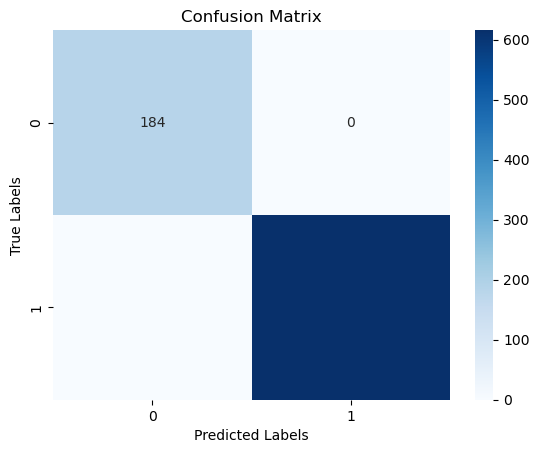

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
